## Geocoding
GeoPandas supports geocoding (i.e., converting place names to location on Earth) through [geopy](http://geopy.readthedocs.io/), an optional dependency of GeoPandas. The following example shows how to get the locations of boroughs in New York City, and plots those locations along with the detailed borough boundary file included within GeoPandas.

In [1]:
import geodatasets
import geopandas

In [2]:
boros = geopandas.read_file(geodatasets.get_path("nybb"))
boros.BoroName

0    Staten Island
1           Queens
2         Brooklyn
3        Manhattan
4            Bronx
Name: BoroName, dtype: object

In [3]:
boro_locations = geopandas.tools.geocode(boros.BoroName)
boro_locations

,geometry,address
0,POINT (-74.14960 40.58346),"Staten Island, New York, New York, United States"
1,POINT (-73.82831 40.71351),"Queens, New York, New York, United States"
2,POINT (-73.94972 40.65260),"Brooklyn, New York, New York, United States"
3,POINT (-73.95989 40.78962),"Manhattan, New York, New York, United States"
4,POINT (-73.87859 40.84665),"The Bronx, New York, New York, United States"


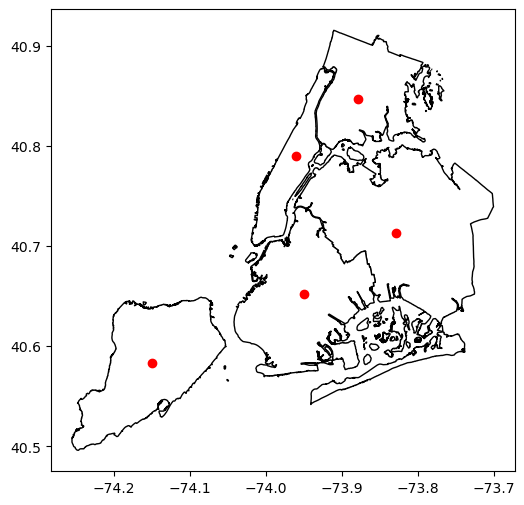

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

boros.to_crs("EPSG:4326").plot(ax=ax, color="white", edgecolor="black");
boro_locations.plot(ax=ax, color="red");

By default, the [`geocode()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.tools.geocode.html#geopandas.tools.geocode) function uses the [Photon geocoding API](https://photon.komoot.io/). But a different geocoding service can be specified with the *`provider`* keyword.

The argument to *`provider`* can either be a string referencing geocoding services, such as *`'google'`*, *`'bing'`*, *`'yahoo'`*, and *`'openmapquest'`*, or an instance of a [`Geocoder`](https://geopy.readthedocs.io/en/stable/index.html#module-geopy.geocoders) from [`geopy`](https://geopy.readthedocs.io/en/stable/index.html#module-geopy). See *`geopy.geocoders.SERVICE_TO_GEOCODER`* for the full list. For many providers, parameters such as API keys need to be passed as *`**kwargs`* in the [`geocode()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.tools.geocode.html#geopandas.tools.geocode) call.

For example, to use the OpenStreetMap Nominatim geocoder, you need to specify a user agent:
```python
geopandas.tools.geocode(boros.BoroName, provider='nominatim', user_agent="my-application")
```

> Please consult the Terms of Service for the chosen provider. The example above uses *`'photon'`* (the default), which expects fair usage - extensive usage will be throttled. ([Photon’s Terms of Use](https://photon.komoot.io/)).